# Exemple de fiche Jupyter
## Introduction
Cette fiche présente les différentes possibilités offertes par les notebooks Jupyter et l'API du module Python "trustutils" pour réaliser des fiches de validation.
Pour fonctionner correctement, les notebooks nécessitent un environnement particulier décrit dans le fichier README à la racine des fiches Jupyter dans TRUST.

## Fonctions de présentation

Voici quelques méthodes utiles pour créer des fiches de validation. Cependant si vous voulez personaliser vos fiches de validation, vous pouvez vous aider de ces links pour les créer:

* https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd un lien qui explique bien la syntaxe markdown
* https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks#entire-books-or-other-large-collections-of-notebooks-on-a-topic une liste exhaustive d'exemples de notebook.
* https://visit-sphinx-github-user-manual.readthedocs.io/en/develop/cli_manual/index.html pour controler Visit avec une interface python

### Paramètres généraux

Les blocks introductifs peuvent être générés automatiquement

In [1]:
from trustutils import run

#declaration of name and date (optional)
run.introduction("Funky Francis","21/11/21") 
run.description("Some description of the case here")
#declaration de la version de trust 
run.TRUST_parameters("1.8.0")

## Introduction 
 Validation made by : Funky Francis


This is the incorrect date string format. It should be DD/MM/YYYY



 Report created : 21/11/21



 Report generated 27/01/2022

### Description 
Some description of the case here

### TRUST parameters 
 * Version TRUST: 1.8.0
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/SampleForm/build)

## Fonction Jupyter-Run

Les cas tests qui doivent être exécutées dans la fiche peuvent être ajoutés via l'API offerte par le module <code>run</code>:

In [2]:
from trustutils import run

Ensuite, la méthode <code>addCase</code> permet de créer un objet de type <code>TRUSTCase</code> qui dispose de méthode pour copier et/ou modifier le jeu de données.
Par défaut, lors du 1er appel, cela:

* copie l'ensemble du répertoire <code>src</code> dans <code>build</code>
* invoque le script <code>prepare</code> s'il existe (sur des nouvelles fiches, les utilisateurs sont encouragés à effectuer les manips habituellement faites dans le prepare directement dans une cellule Jupyter Shell)

Voir la classe <code>run.TRUSTSuite</code> pour contrôler cela plus finement.

In [3]:
# Au départ, ou pour la mise au point, il peut être utile de tout remettre à 0. Cela supprime le répertoire
# de build, et vide la liste des cas à exécuter:
run.reset()

# Ici on ajoute un cas qu'on veut lancer, en specifiant le nombre de proceseurs qu'on veut (valeur par defaut=1)
run.addCase(".","Loi_Fermeture_Test.data")

# Un autre cas, en gardant dans une variable l'objet TRUSTCase ainsi créé pour pouvoir le manipuler:
casT = run.addCase(".","grad_u_transpose_3d.data")

# Méthodes pour copier simplement un cas - le nom sera "Copy_XXXX", et le cas sera dans le même dossier
casS = casT.copy("NouveauNom1.data")
# Remarque: On peut utiliser les options pour mieux gerer l'arborescence des fichiers dans le build
cas_notUsed = casT.copy("NouveauNom2.data", directory="NouveauRep")

# Le cas peut ensuite être ajouté à la liste à exécuter avec addCase
run.addCase(casS)

# Méthode pour substituer un morceau de code, cela fait une substitution en place:
casS.substitute("Mailler dom","Mailler dom \n# un commentaire bidon #")

Pour avoir accès à la liste des cas tests qui vont être exécutés:

In [4]:
run.printCases()

### Test cases 
* ./Loi_Fermeture_Test.data : 
* ./grad_u_transpose_3d.data : 
* ./NouveauNom1.data : 


Le jeu de données peut être affiché avec:

In [5]:
casS.dumpDataset(["dom"])  # mise en surbrillance d'un mot spécifique

 # Hydraulique 3D pour tester le grad(u)^T du tenseur visqueux #
 
 dimension 3
 
 Pb_hydraulique pb
 
 Domaine dom
 
 Mailler dom 
 # un commentaire bidon #
 {
         Pave Cavite
         {
                 Origine -1. -1. -1.
                 Nombre_de_noeuds 6 6 6
                 Longueurs 2. 2. 2.
         }
         {
                 Bord Gauche   Y = -1.  -1. <= X <= 1.  -1. <= Z <= 1.
                 Bord Droit    Y =  1.  -1. <= X <= 1.  -1. <= Z <= 1.
                 Bord Bas      Z = -1.  -1. <= X <= 1.  -1. <= Y <= 1.
                 Bord Haut     Z =  1.  -1. <= X <= 1.  -1. <= Y <= 1.
                 Bord Derriere X = -1.  -1. <= Y <= 1.  -1. <= Z <= 1.
                 Bord Devant   X =  1.  -1. <= Y <= 1.  -1. <= Z <= 1.
         }
 }
 
 EF dis
 
 Scheme_euler_explicit sch
 Read sch
 {
 	 tinit 0
 	 tmax 10
 	 dt_max 5.e-3
 	 dt_impr 5.e-1
 	 dt_sauv 10
 	 seuil_statio 1.e-8
 	 dt_min 5e-5
     nb_pas_dt_max 10
 }
 #
 	 solveur implicite { seuil_convergence_solve

La méthode dumpDataset est spécifique au fichier \*.data, pour afficher un fichier general, on utilisera la méthode run.dumpData('nom_du_fichier',list_keywords=[ ])

Ensuite le lancement des cas se fait avec la méthode <code>runCases</code>. 

* le script <code>prepare</code> (s'il existe) est exécuté, 
* et ensuite pour chaque cas
 * le script <code>pre_run</code> est exécuté, 
 * puis le cas test 
 * et enfin le script <code>post_run</code>
 
 Si un cas test plante, les 20 dernières lignes du fichier .err sont automatiquement affichées (vous pouvez par ex essayer de modifier le <code>substitute()</code> précédent pour faire planter un cas).

In [6]:
# Methode pour lancer les cas tests
run.runCases()
# L'option 'verbose' permet d'afficher la sortie de TRUST
# Ce qui n'est en general pas voulu car cela est deja dans le terminal
#run.runCases(verbose=True)
# L'option 'preventConcurrent=True' permet de s'assurer que les cas seront executes dans l'ordre
# ou ils ont ete enregistres. Sinon, si le Sserver est actif, celui-ci sera automatiquement utilise.
#run.runCases(preventConcurrent=True)

Running **with Sserver**...
  => A total of 3 cases were (successfully) run in 0.2s.


In [7]:
# Le lancement d'une commande ou d'un script bash supplementaire
# run.executeScript("calcul_nb_mailles") #TODO
# run.dumpData("fin_total")

Et enfin on peut afficher la table des performances pour tous les cas test exécutés:

In [8]:
# Methodes pour afficher le tableau de performance
run.tablePerf()

,host,system,Total CPU Time,CPU time/step,number of cells
./Loi_Fermeture_Test,is244522,Linux,0.005498,0.000598,4
./grad_u_transpose_3d,is244522,Linux,0.015745,0.0009544,125
./NouveauNom1,is244522,Linux,0.015619,0.0009417,125
Total,,,0.036862,,


## Fonctions Jupyter-Plot
Le module 'trustutils.plot' permet d'afficher des courbes et autres graphiques à partir des fichiers sondes de TRUST, ou à partir des fichiers LATA. Elle est basée sur matplotlib.

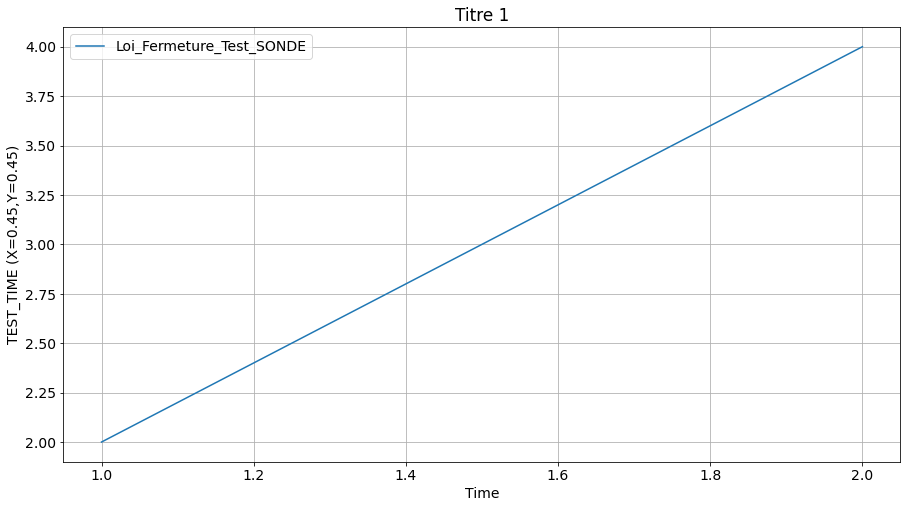

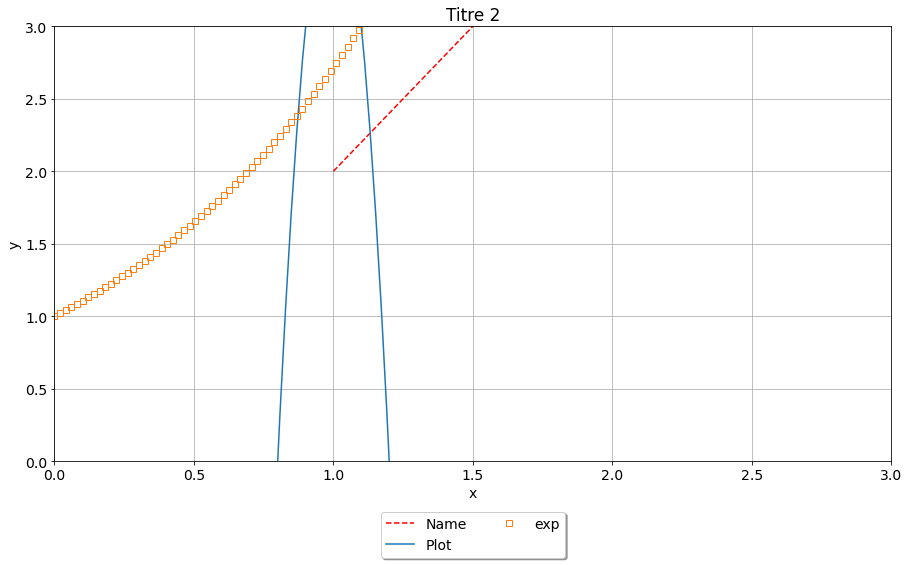

In [9]:
from trustutils import plot
import numpy as np

# Graphe simple
Graph=plot.Graph("Titre 1",size=[15,8])
Graph.addPoint("Loi_Fermeture_Test_SONDE.son")

# Graphe plus complexe
Graph=plot.Graph("Titre 2",size=[15,8])
Graph.addPoint("Loi_Fermeture_Test_SONDE.son",label="Name",color="r",marker="--")

# Pour ajouter une courbe quelconque il faut utiliser la methode 
# "add". Si on veut charger un fichier semblable
# a une fichier texte, on peut se servir de la methode 
# plot.loadText("direction_du_fichier.txt")
x=np.linspace(0,2,100)
y=-100*(x-1)*(x-1)+4
Graph.add(x,y,label="Plot")

# Les fonctions add, addPoint et addSegment prennent en options 
# les arguments de matplotlib.pyplot.plot
y = np.exp(x)
Graph.add(x,y,label="exp",linewidth=3.,marker='s',mfc='none')

# La fonction legend les arguments de matplotlib.pyplot.legend
Graph.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=2)

# Methode pour changer les titres des axes.
Graph.label("x","y")


# Methode pour cadrer le plot.
# Tous les parametres ne sont pas obligatoires:
Graph.visu(xmin=0,xmax=3,ymin=0,ymax=3)


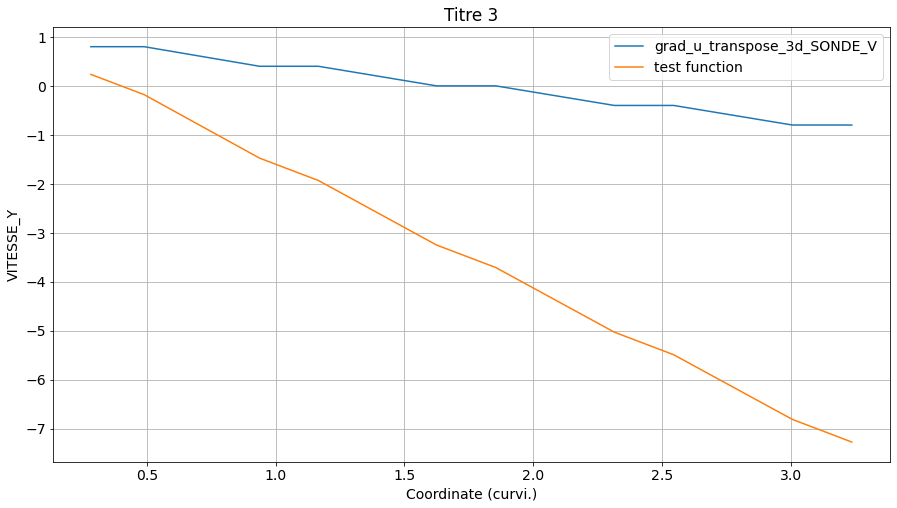

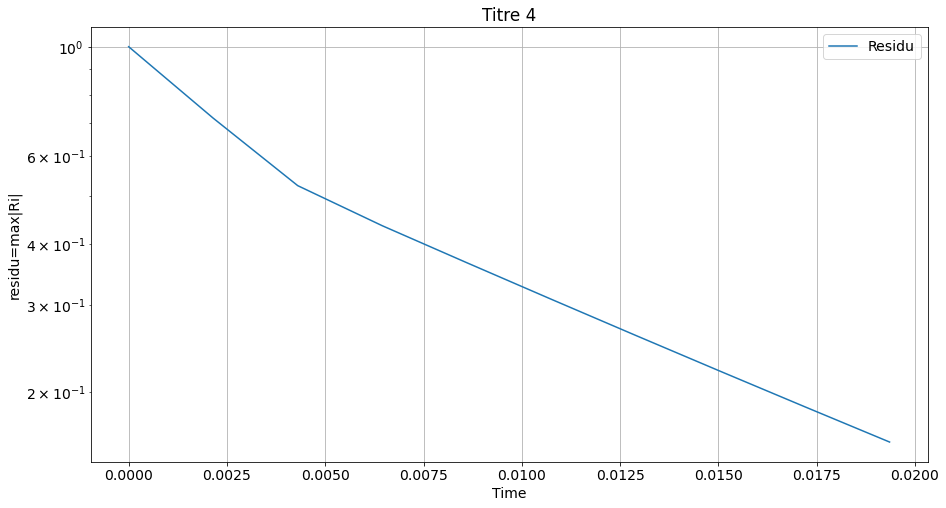

In [10]:
from trustutils import plot

# Possibilite de tracer les variables des sondes de type segments avec 
# la valeur du temps (dernier pas de temps par defaut) et de la coordonnee a tracer 
# si il s'agit d'un vecteur a plusieurs dimensions (par ex la vitesse)
Graph=plot.Graph("Titre 3",size=[15,8])
Graph.addSegment("grad_u_transpose_3d_SONDE_V.son",var="y",value=0.)

# Possibilite d'ajouter une fonction Y=f(X,Y) dans addSegment et addPoint (peut permettre de calculer par exemple une erreur)

def substraction(x,y):
    return y - 2.*x

Graph.addSegment("grad_u_transpose_3d_SONDE_V.son",var="y",label='test function',func=substraction)

# Plot des Residus
Graph=plot.Graph("Titre 4",size=[15,8])
Graph.addResidu("grad_u_transpose_3d.dt_ev",label="Residu")

# Methode pour modifier les echelles des axes
Graph.scale(yscale='log')

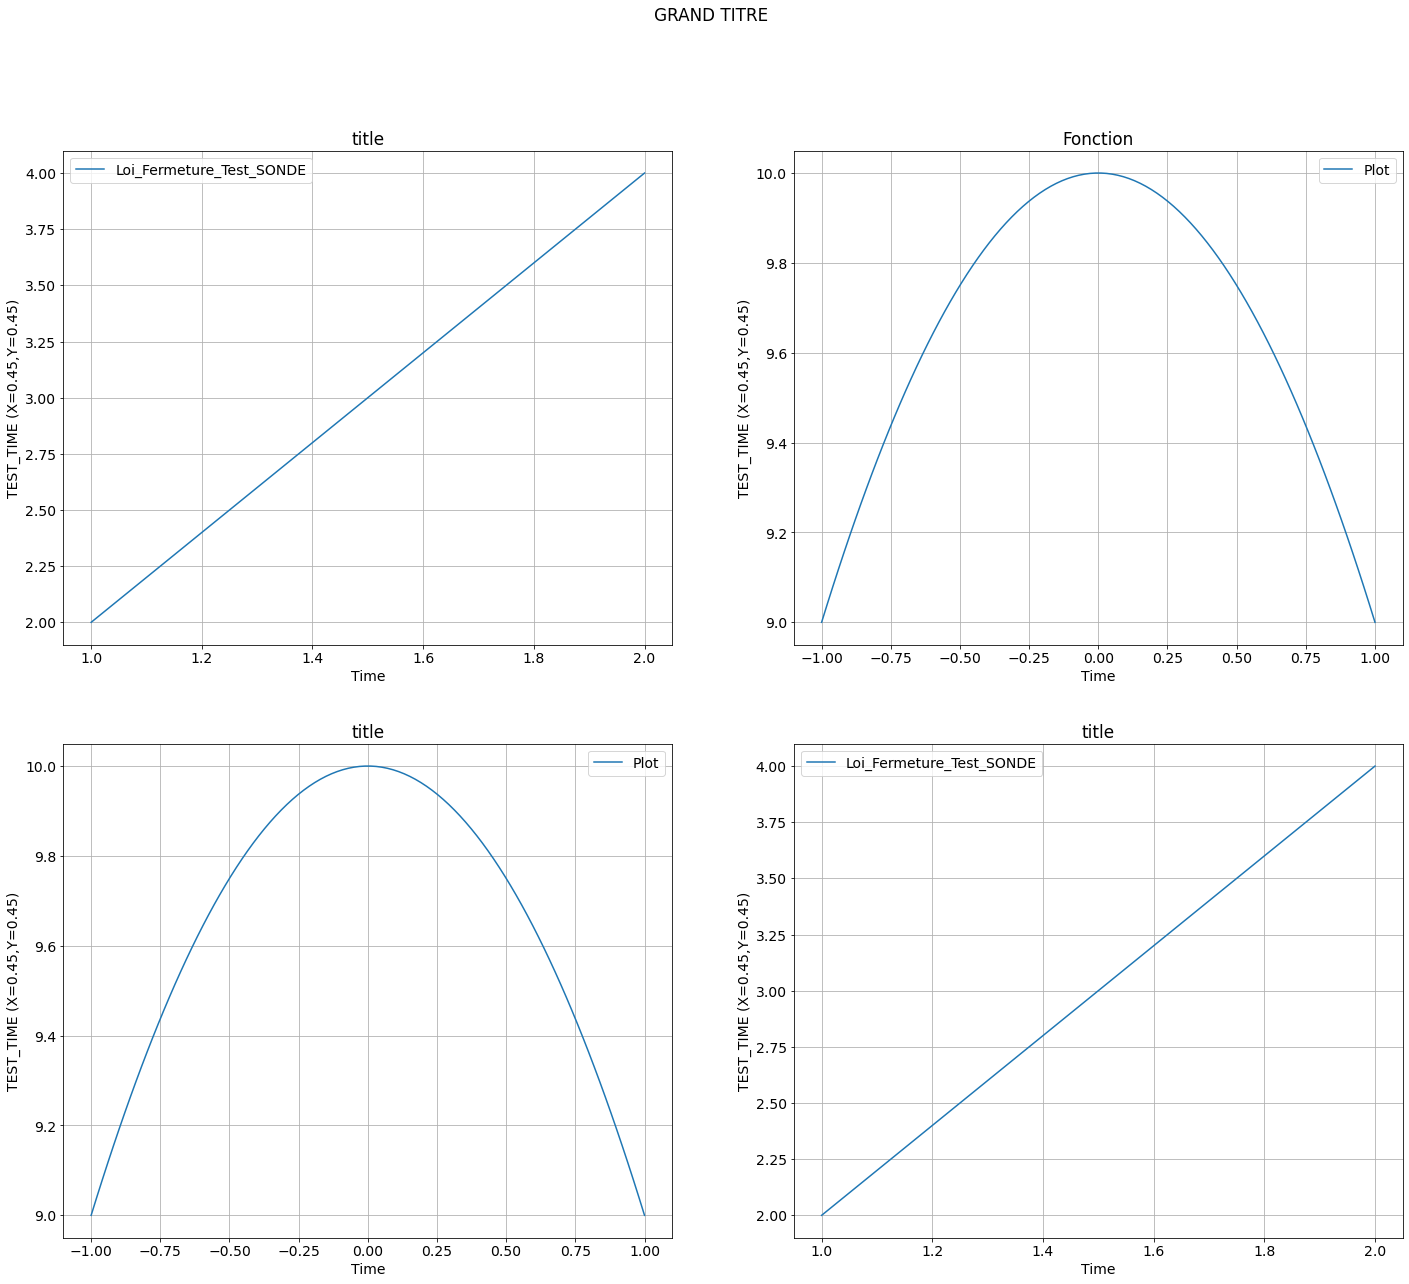

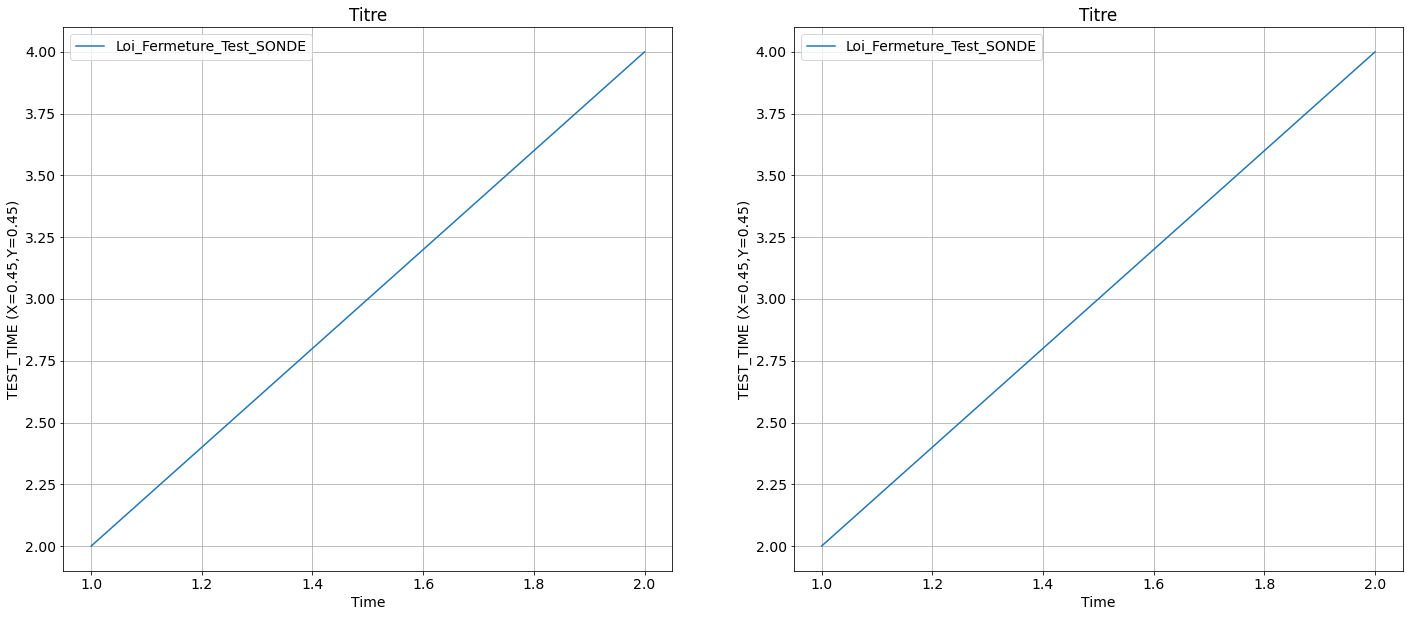

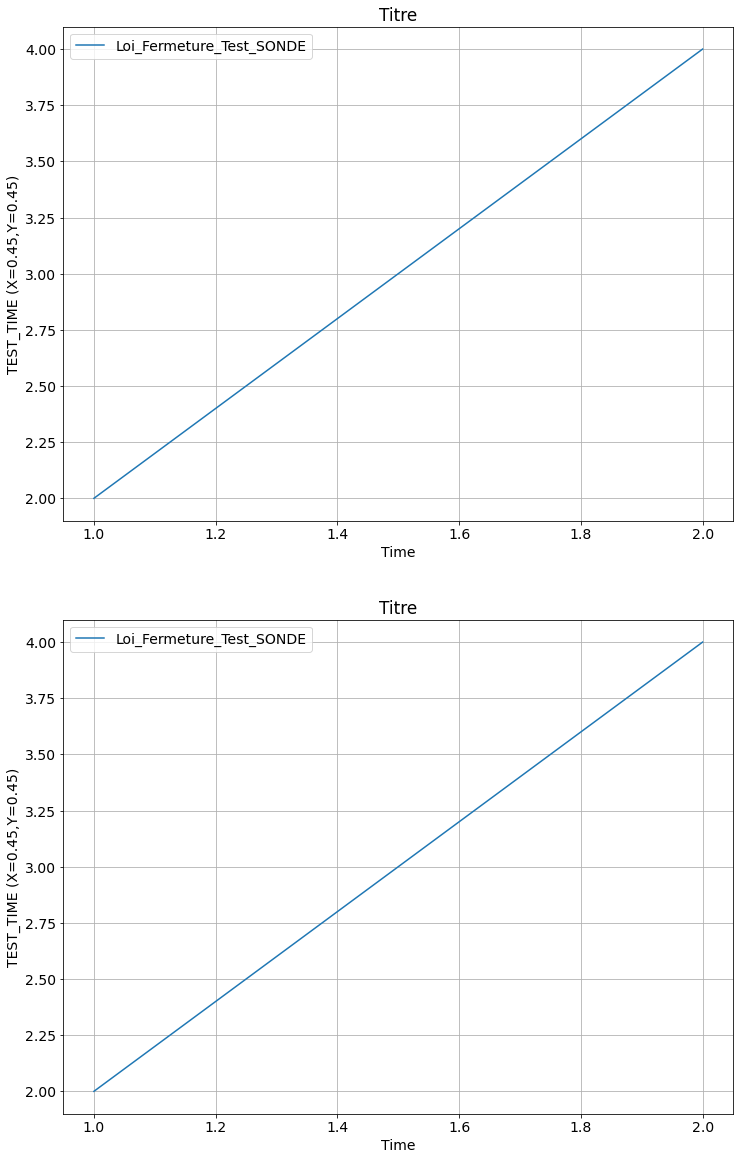

In [11]:
from trustutils import plot
import numpy as np 

# Multiplot carre
Graph=plot.Graph(title="title",subtitle="GRAND TITRE",nX=2,nY=2)
Graph.addPoint("Loi_Fermeture_Test_SONDE.son")
Graph.addPlot([1,1])
Graph.addPoint("Loi_Fermeture_Test_SONDE.son") 
Graph.addPlot([1,0])

x=np.linspace(-1,1,100)
y=-x*x+10
Graph.add(x,y,label="Plot")
Graph.add(x,y,label="Plot",title="Fonction",xIndice=0,yIndice=1)

# Multiplot horizontal
Graph=plot.Graph("Titre",nX=1,nY=2) # nX=1 est la valeur par defaut -- peut etre omise
Graph.addPoint("Loi_Fermeture_Test_SONDE.son")
Graph.addPlot(1)
Graph.addPoint("Loi_Fermeture_Test_SONDE.son")

# Multiplot vertical
Graph=plot.Graph("Titre",nX=2,nY=1)
Graph.addPoint("Loi_Fermeture_Test_SONDE.son")
Graph.addPlot(1)
Graph.addPoint("Loi_Fermeture_Test_SONDE.son")


## Fonction visitutils
Visitutils est un module dont le but est d'aider l'utilisateur à obtenir des plots VisIt.

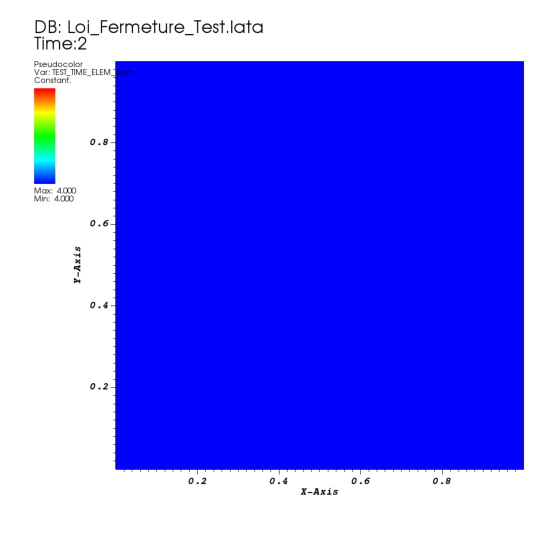

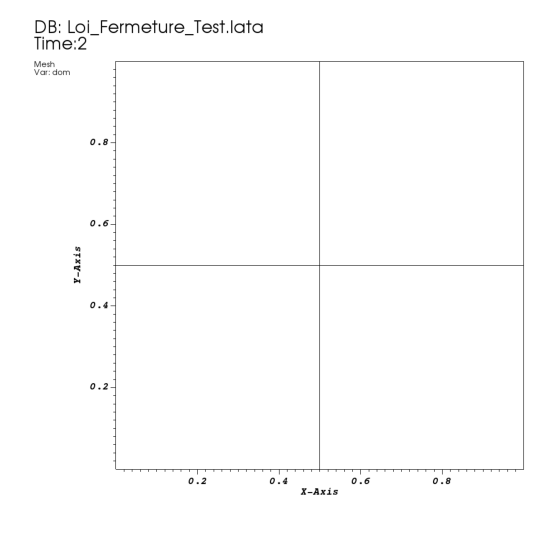

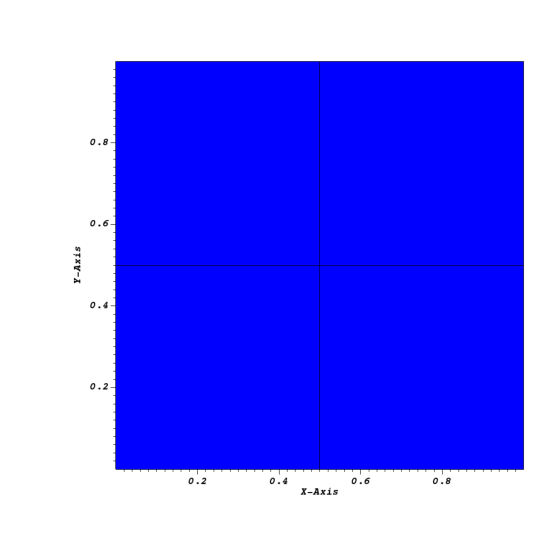

In [12]:
from trustutils import visit

# Comande simple pour visualiser le champ ou le maillage
visit.showField("Loi_Fermeture_Test.lata","Pseudocolor","TEST_TIME_ELEM_dom",plotmesh=False)
visit.showMesh("Loi_Fermeture_Test.lata")

fig=visit.Show("Loi_Fermeture_Test.lata","Pseudocolor","TEST_TIME_ELEM_dom")
fig.addField("Loi_Fermeture_Test.lata","Pseudocolor","TEST_TIME_SOM_dom")
# possibilite d'ajouter une liste d'options de visualisation
fig.visuOptions(['no_databaseinfo','no_legend'])

#Toujours finir avec l'initialisation visit.Show()
fig.plot()

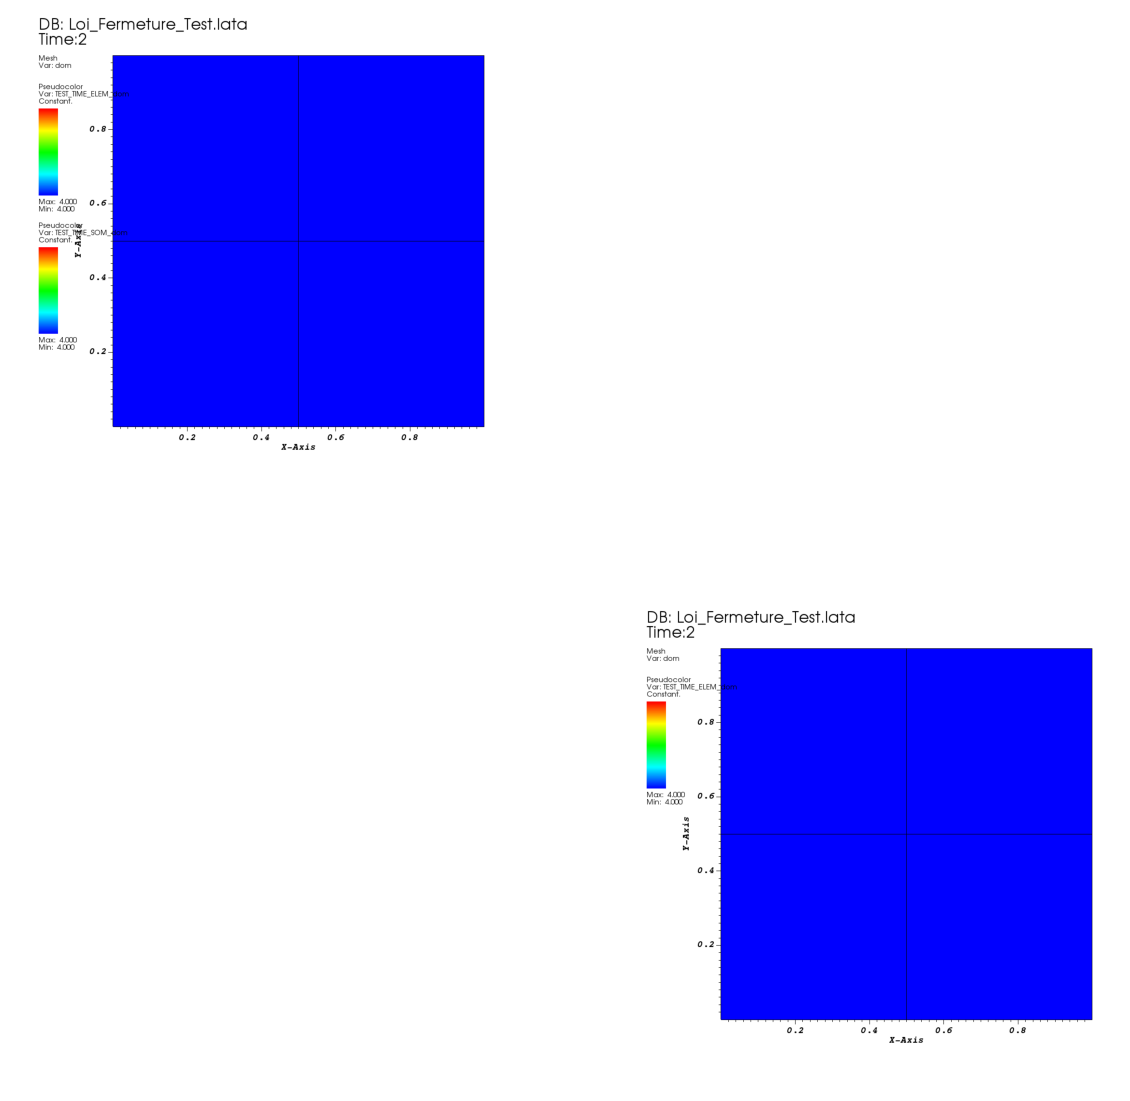

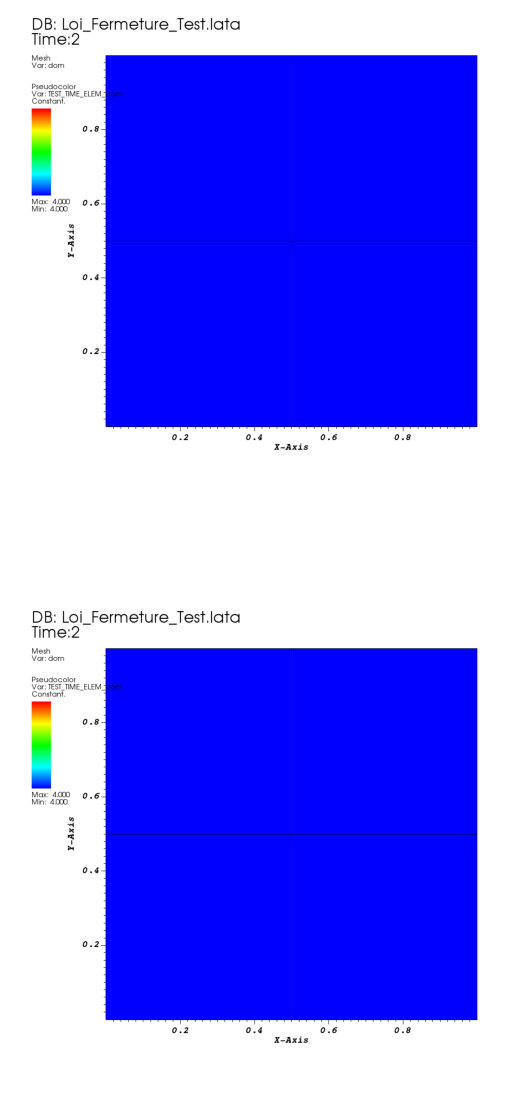

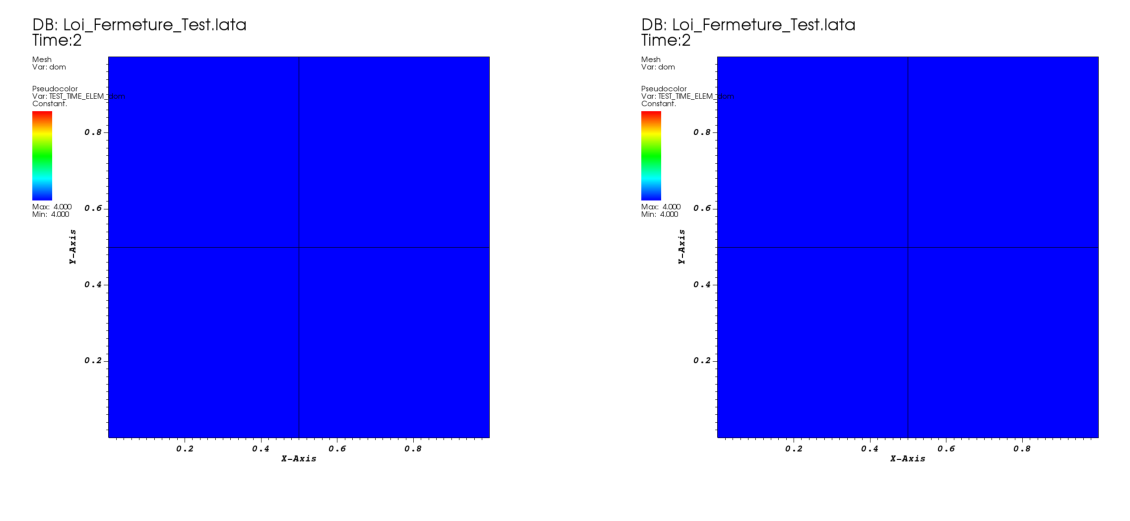

In [13]:
from trustutils import visit

# Multiplot carré
fig=visit.Show("Loi_Fermeture_Test.lata","Pseudocolor","TEST_TIME_ELEM_dom",nY=2,nX=2)
fig.addField("Loi_Fermeture_Test.lata","Pseudocolor","TEST_TIME_SOM_dom") 
fig.add("Loi_Fermeture_Test.lata","Pseudocolor","TEST_TIME_ELEM_dom",xIndice=1,yIndice=1) 
fig.plot()

# Multiplot horizontal
fig=visit.Show("Loi_Fermeture_Test.lata","Pseudocolor","TEST_TIME_ELEM_dom",nY=1,nX=2)
fig.add("Loi_Fermeture_Test.lata","Pseudocolor","TEST_TIME_ELEM_dom",1)
fig.plot()

# Multiplot vertical
fig=visit.Show("Loi_Fermeture_Test.lata","Pseudocolor","TEST_TIME_ELEM_dom",nY=2,nX=1)
fig.add("Loi_Fermeture_Test.lata","Pseudocolor","TEST_TIME_ELEM_dom",1)
fig.plot()

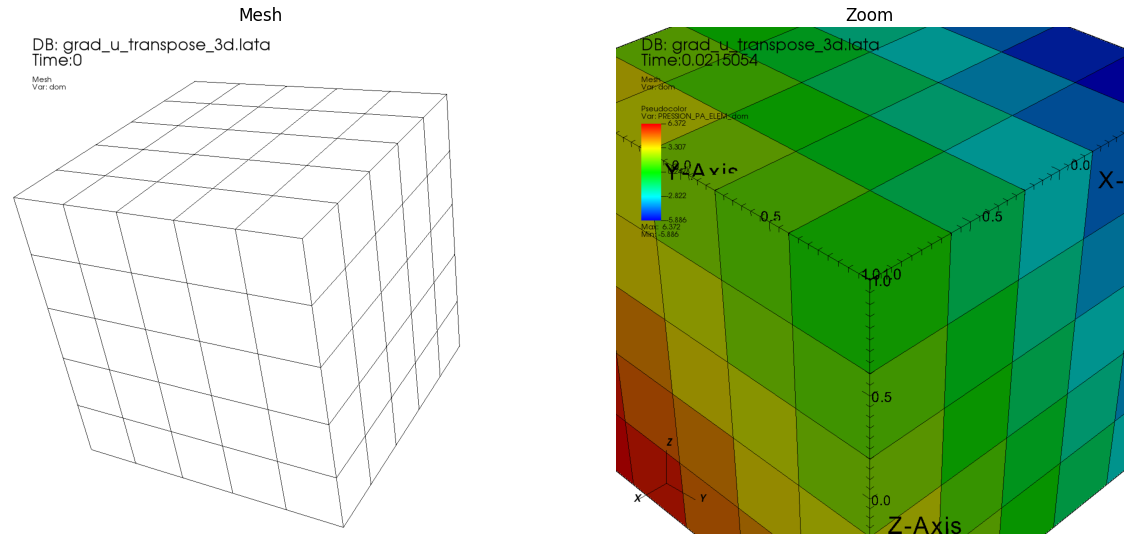

In [14]:
#Cas 3D
from trustutils import visit

plot=visit.Show("./grad_u_transpose_3d.lata", "Mesh", "dom", plotmesh=True,nY=2,time=0,title="Mesh")
# Possibilite de faire varier la perspective avec rotation3D, normal3D, up3D, zoom3D et zoom2D
plot.rotation3D([45,45,45])
plot.visuOptions(["no_axes","no_bounding_box","no_triad"])

plot.add("./grad_u_transpose_3d.lata", "Pseudocolor", "PRESSION_PA_ELEM_dom",plotmesh=True,yIndice=1,title="Zoom")
plot.normal3D([0.5,0.5,0.5])
plot.up3D([0,0,1])
plot.zoom3D([0.,0.,1.5])
plot.plot()


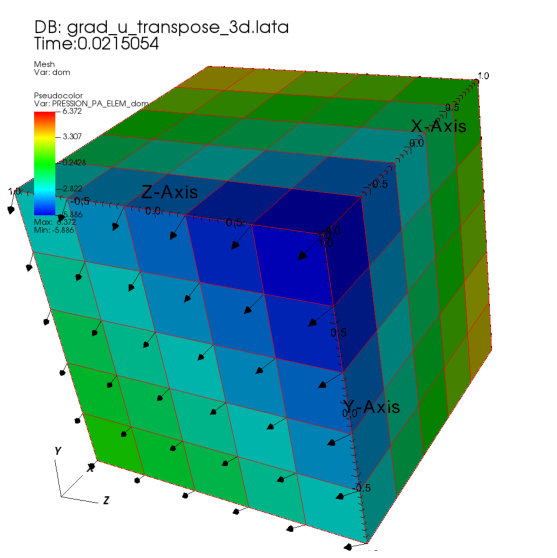

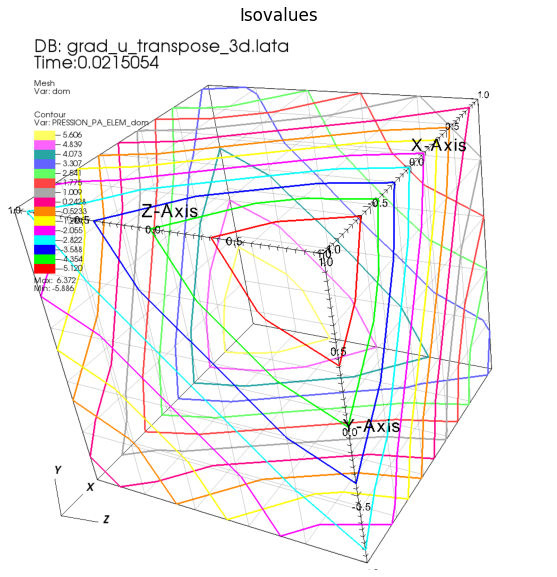

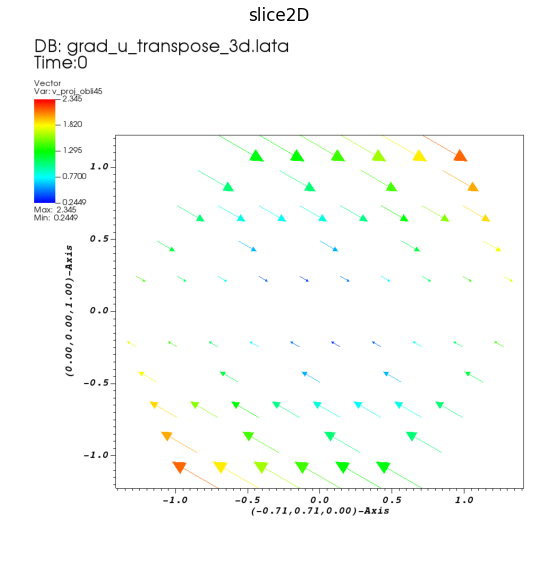

In [15]:
plot=visit.Show("./grad_u_transpose_3d.lata", "Pseudocolor", "PRESSION_PA_ELEM_dom",plotmesh=True)
plot.addField("./grad_u_transpose_3d.lata", "Vector", "VITESSE_SOM_dom",plotmesh=True)
plot.rotation3D([45,45,45])

# Options disponibles
plot.blackVector()
plot.meshColor("red")

plot.plot()

plot = visit.Show("./grad_u_transpose_3d.lata", "Contour", "PRESSION_PA_ELEM_dom",title="Isovalues")
plot.rotation3D([45,45,45])
plot.meshTrans()
# Reproduction des commandes visit
plot.visitCommand("ContourAtts = ContourAttributes()")
plot.visitCommand("ContourAtts.lineWidth = 2")
plot.visitCommand("ContourAtts.wireframe = 1")
plot.visitCommand("ContourAtts.contourNLevels = 15")
plot.visitCommand("SetPlotOptions(ContourAtts)")

plot.plot()

# Il est egalement d'utiliser l'option empty=True 
# pour contruire sur une base initialement vide
a=visit.Show(time=0,empty=True,title="slice2D")
a.visitCommand("OpenDatabase('grad_u_transpose_3d.lata', 0)")
a.visitCommand("DefineVectorExpression('v_proj_obli45', '{VITESSE_X_SOM_dom/2+VITESSE_Z_SOM_dom/2,VITESSE_Y_SOM_dom,VITESSE_X_SOM_dom/2+VITESSE_Z_SOM_dom/2}')")
a.visitCommand("AddPlot('Vector', 'v_proj_obli45', 1, 0)")

# Formation d'une slice2D
a.slice(origin=[0,0,0],normal=[1,1,1.],type_op='slice_2D')
a.visitCommand("VectorAtts = VectorAttributes()")
a.visitCommand("VectorAtts.useStride = 1")
a.visitCommand("VectorAtts.stride = 1")
a.visitCommand("VectorAtts.autoScale = 0")
a.visitCommand("VectorAtts.scale = 0.3")
a.visitCommand("SetPlotOptions(VectorAtts)")
a.visitCommand("DrawPlots()")
a.plot()



En cas de difficulté, l'historique des commandes cli d'une visu est enregistré dans le fichier tmp_visit.py et peut être rejoué avec <code>visit -cli -s tmp_visit.py</code>

## Fonction Jupyter-Widget
<code>trustutils.widget</code> est un module qui permet de créer un widget interfactif dans le notebook.
Cela peut typiquement être utilisé pour mettre au point une visualisation. Une fois que tous les paramètres sont fixés, on peut garder dans le notebook final que la commande <code>visit.Show</code> correspondante pour alléger la fiche (moins lourd que le widget, et plus portable).

In [16]:
# A seulement utiliser pour la mise au point de la fiche, pas pour sa version finale !!
from trustutils import widget

# Version alpha
widget.interface("./grad_u_transpose_3d.lata","Pseudocolor","PRESSION_PA_ELEM_dom") 

interactive(children=(Text(value='./grad_u_transpose_3d.lata', description='fichier'), Text(value='Pseudocolor…